<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name</b></td>
    <td style="text-align:left">Aishwarya Chandramouli</td>
</tr>
<tr>
    <td> </td>
    <td style="text-align:left">ac78n@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Assignment:</b></td>
    <td style="text-align:left">Programming Assignment 02</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">2021-06-22</td>
</tr>
</table>

In [1]:
# Imported for data management (dataframes)
import pandas as pd
import numpy as np

# Imported for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import to create train or test set in the data 
from sklearn.model_selection import train_test_split

## Concept Description:

Given a comma separated value file on "forest fires", need to determine and analyze the attributes in the given dataset.

## Data Collection: 

The dataset has been provided as a part of our assignment. 

## Example Description:
<b>coord_X</b>  
x-axis spatial coordinate within a topographical map of the area of interest.

<b>coord_Y</b>  
y-axis spatial coordinate within a topographical map of the area of interest.

<b>month</b>  
the month in which the forest fire happened

<b>day</b>  
the day of the week in which the forest fire happened

<b>FFMC</b>  
Fine Fuel Moisture Code from the Fire Weather Index (FWI) System

<b>DMC</b>  
Duff Moisture Code from the Fire Weather Index (FWI) System

<b>DC</b>  
Draught Code from the Fire Weather Index (FWI) System

<b>ISI</b>  
Initial Spread Index from the Fire Weather Index (FWI) System

<b>temp</b>  
temperature in Celsius degrees

<b>RH</b>  
relative humidity in %

<b>wind</b>  
wind speed in km/h

<b>rain</b>  
outside rain in mm/m2

<b>area</b>  
the burned area of the forest in hectares

## Data Import and Wrangling: 

The results of each search is read from the respective comma separated value file (csv) into separate dataframes.  Careful attention is paid to make sure the data is read in as character strings.

In [2]:
# Loading the forest fire dataset

df_forest = pd.read_csv("forestfires.csv", dtype=str)
df_forest

,coord_X,coord_Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
515,1,4,aug,sat,94.4,146,614.7,11.3,25.6,42,4,0,0


In [3]:
df_forest.columns

Index(['coord_X', 'coord_Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI',
       'temp', 'RH', 'wind', 'rain', 'area'],
      dtype='object')

In [4]:
# checks the datatypes of each column

df_forest.dtypes

coord_X    object
coord_Y    object
month      object
day        object
FFMC       object
DMC        object
DC         object
ISI        object
temp       object
RH         object
wind       object
rain       object
area       object
dtype: object

#### Here, I have taken attributes to convert it to Numeric data type so that I can plot graphs.

In [5]:
# converting the given datatype to numeric 

df_forest['coord_X'] = pd.to_numeric(df_forest['coord_X'], errors='coerce')
df_forest['coord_X'].dtypes

dtype('int64')

In [6]:
df_forest['coord_Y'] = pd.to_numeric(df_forest['coord_Y'], errors='coerce')
df_forest['coord_Y'].dtypes

dtype('int64')

In [7]:
df_forest['temp'] = pd.to_numeric(df_forest['temp'], errors='coerce')
df_forest['temp'].dtypes

dtype('float64')

In [8]:
df_forest['rain'] = pd.to_numeric(df_forest['rain'], errors='coerce')
df_forest['rain'].dtypes

dtype('float64')

In [9]:
df_forest['wind'] = pd.to_numeric(df_forest['wind'], errors='coerce')
df_forest['wind'].dtypes

dtype('float64')

In [10]:
df_forest['area'] = pd.to_numeric(df_forest['area'], errors='coerce')
df_forest['area'].dtypes

dtype('float64')

In [11]:
df_forest['RH'] = pd.to_numeric(df_forest['RH'], errors='coerce')
df_forest['RH'].dtypes

dtype('int64')

In [12]:
df_forest['FFMC'] = pd.to_numeric(df_forest['FFMC'], errors='coerce')
df_forest['FFMC'].dtypes

dtype('float64')

In [13]:
df_forest['DMC'] = pd.to_numeric(df_forest['DMC'], errors='coerce')
df_forest['DMC'].dtypes

dtype('float64')

In [14]:
df_forest['DC'] = pd.to_numeric(df_forest['DC'], errors='coerce')
df_forest['DC'].dtypes

dtype('float64')

In [15]:
df_forest['ISI'] = pd.to_numeric(df_forest['ISI'], errors='coerce')
df_forest['ISI'].dtypes

dtype('float64')

### General Discussion:

#### Get a count of how many examples, and how many attributes the data set has.¶

In [16]:
# Groupby single category to find the count

df_forest.groupby('coord_X').count()

,coord_Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
coord_X,,,,,,,,,,,,
1,48,48,48,48,48,48,48,47,48,48,48,48
2,73,73,73,73,73,73,73,73,73,73,73,73
3,55,55,55,55,55,55,55,54,55,55,55,55
4,91,91,91,91,91,91,91,91,91,91,91,91
5,30,30,30,30,30,30,30,30,30,30,30,30
6,86,86,86,86,86,86,86,86,86,86,86,86
7,60,60,60,60,60,60,60,60,60,60,60,60
8,61,61,61,61,61,61,61,61,61,61,61,61
9,13,13,13,13,13,13,13,13,13,13,13,13


In [17]:
# Groupby multiple categories to find count 

df_forest.groupby(['day','coord_X','coord_Y','FFMC','DMC','DC','ISI','RH','month','temp','rain','area','wind']).count()

Empty DataFrame
Columns: []
Index: [(fri, 1, 2, 90.1, 108.0, 529.8, 12.5, 66, aug, 14.7, 0.0, 0.0, 2.7), (fri, 1, 2, 90.7, 80.9, 368.3, 16.8, 78, jul, 14.8, 0.0, 0.0, 8.0), (fri, 1, 2, 91.0, 166.9, 752.6, 7.1, 41, aug, 25.9, 0.0, 0.0, 3.6), (fri, 1, 2, 91.0, 166.9, 752.6, 7.1, 73, aug, 18.5, 0.0, 0.0, 8.5), (fri, 1, 3, 91.1, 91.3, 738.1, 7.2, 46, sep, 19.1, 0.0, 0.33, 2.2), (fri, 1, 3, 95.9, 158.0, 633.6, 11.3, 27, aug, 32.4, 0.0, 0.0, 2.2), (fri, 1, 3, 95.9, 158.0, 633.6, 11.3, 29, aug, 27.5, 0.0, 43.32, 4.5), (fri, 1, 4, 90.5, 196.8, 649.9, 16.3, 88, aug, 11.8, 0.0, 9.71, 4.9), (fri, 1, 4, 90.6, 269.8, 811.2, 5.5, 45, aug, 22.2, 0.0, 0.0, 3.6), (fri, 1, 4, 92.5, 122.0, 789.7, 10.2, 39, sep, 21.1, 0.0, 8.12, 2.2), (fri, 2, 2, 86.6, 13.2, 43.0, 5.3, 51, feb, 12.3, 0.0, 0.0, 0.9), (fri, 2, 2, 88.3, 150.3, 309.9, 6.8, 79, jul, 13.4, 0.0, 37.02, 3.6), (fri, 2, 2, 92.4, 117.9, 668.0, 12.2, 33, sep, 19.6, 0.0, 0.0, 5.4), (fri, 2, 2, 92.4, 117.9, 668.0, 12.2, 33, sep, 19.6, 0.0, 0.0, 6.3), (fri, 2, 2, 92.4, 117.9, 668.0, 12.2, 37, sep, 23.0, 0.0, 0.0, 4.5), (fri, 2, 4, 91.0, 166.9, 752.6, 7.1, 41, aug, 25.9, 0.0, 0.0, 3.6), (fri, 2, 4, 91.6, 112.4, 573.0, 8.9, 42, aug, 21.4, 0.0, 4.25, 3.1), (fri, 2, 5, 90.3, 290.0, 855.3, 7.4, 58, sep, 16.2, 0.0, 9.96, 3.6), (fri, 2, 5, 93.9, 135.7, 586.7, 15.1, 36, aug, 23.5, 0.0, 10.02, 5.4), (fri, 3, 4, 91.6, 112.4, 573.0, 8.9, 84, aug, 11.2, 0.0, 3.3, 7.6), (fri, 3, 4, 91.7, 33.3, 77.5, 9.0, 18, mar, 18.8, 0.0, 0.0, 4.5), (fri, 3, 4, 92.1, 99.0, 745.3, 9.6, 57, sep, 17.4, 0.0, 0.0, 4.5), (fri, 3, 4, 93.3, 141.2, 713.9, 13.9, 49, sep, 18.6, 0.0, 35.88, 3.6), (fri, 3, 4, 94.3, 85.1, 692.3, 15.9, 50, sep, 19.8, 0.0, 0.0, 5.4), (fri, 3, 5, 93.5, 149.3, 728.6, 8.1, 43, sep, 17.2, 0.0, 0.0, 3.1), (fri, 3, 6, 91.1, 94.1, 232.1, 7.1, 38, jun, 19.2, 0.0, 0.0, 4.5), (fri, 4, 3, 89.6, 25.4, 73.7, 5.7, 40, may, 18.0, 0.0, 38.48, 4.0), (fri, 4, 3, 90.3, 290.0, 855.3, 7.4, 44, sep, 19.9, 0.0, 7.8, 3.1), (fri, 4, 3, 92.5, 122.0, 789.7, 10.2, 45, sep, 17.3, 0.0, 3.94, 4.0), (fri, 4, 4, 83.0, 23.3, 85.3, 2.3, 20, apr, 16.7, 0.0, 0.0, 3.1), (fri, 4, 4, 85.9, 19.5, 57.3, 2.8, 43, mar, 13.7, 0.0, 0.0, 5.8), (fri, 4, 4, 92.1, 99.0, 745.3, 9.6, 35, sep, 20.8, 0.0, 1.26, 4.9), (fri, 4, 4, 92.1, 99.0, 745.3, 9.6, 35, sep, 20.8, 0.0, 13.06, 4.9), (fri, 4, 4, 92.1, 99.0, 745.3, 9.6, 53, sep, 15.4, 0.0, 7.31, 6.3), (fri, 4, 4, 94.3, 167.6, 684.4, 13.0, 53, aug, 21.8, 0.0, 6.54, 3.1), (fri, 4, 5, 85.9, 19.5, 57.3, 2.8, 52, mar, 12.7, 0.0, 0.0, 6.3), (fri, 4, 5, 91.2, 48.3, 97.8, 12.5, 27, mar, 15.8, 0.0, 0.0, 7.6), (fri, 4, 5, 91.6, 100.2, 466.3, 6.3, 40, jul, 22.9, 0.0, 2.64, 1.3), (fri, 4, 5, 91.7, 33.3, 77.5, 9.0, 26, mar, 17.2, 0.0, 0.0, 4.5), (fri, 4, 5, 94.3, 85.1, 692.3, 15.9, 37, sep, 17.7, 0.0, 0.0, 3.6), (fri, 4, 6, 84.7, 26.7, 352.6, 4.1, 59, dec, 2.2, 0.0, 9.27, 4.9), (fri, 5, 4, 85.2, 4.9, 15.8, 6.3, 46, feb, 7.5, 0.0, 24.24, 8.0), (fri, 5, 4, 90.3, 290.0, 855.3, 7.4, 58, sep, 16.2, 0.0, 0.0, 3.6), (fri, 5, 4, 91.0, 166.9, 752.6, 7.1, 71, aug, 21.1, 1.4, 2.17, 7.6), (fri, 5, 4, 91.7, 33.3, 77.5, 9.0, 25, mar, 15.6, 0.0, 0.0, 6.3), (fri, 5, 4, 92.1, 99.0, 745.3, 9.6, 64, sep, 12.8, 0.0, 1.64, 3.6), (fri, 5, 4, 92.1, 99.0, 745.3, 9.6, 75, sep, 10.1, 0.0, 0.0, 3.6), (fri, 5, 4, 92.1, 99.0, 745.3, 9.6, 75, sep, 10.1, 0.0, 3.71, 3.6), (fri, 5, 4, 93.3, 141.2, 713.9, 13.9, 30, sep, 27.6, 0.0, 0.0, 1.3), (fri, 5, 4, 94.3, 85.1, 692.3, 15.9, 47, sep, 20.1, 0.0, 1.46, 4.9), (fri, 6, 3, 84.1, 7.3, 52.8, 2.7, 42, feb, 14.7, 0.0, 0.0, 2.7), (fri, 6, 3, 88.6, 69.7, 706.8, 5.8, 37, sep, 20.6, 0.0, 0.0, 1.8), (fri, 6, 3, 91.1, 141.1, 629.1, 7.1, 39, aug, 19.3, 0.0, 1.56, 3.6), (fri, 6, 3, 92.5, 122.0, 789.7, 10.2, 39, sep, 19.7, 0.0, 0.0, 2.7), (fri, 6, 3, 92.5, 122.0, 789.7, 10.2, 55, sep, 15.9, 0.0, 0.0, 3.6), (fri, 6, 3, 94.3, 85.1, 692.3, 15.9, 24, sep, 25.4, 0.0, 0.0, 3.6), (fri, 6, 4, 94.8, 227.0, 706.7, 12.0, 34, aug, 23.3, 0.0, 28.74, 3.1), (fri, 6, 5, 63.5, 70.8, 665.3, 0.8, 72, aug, 17.0, 0.0, 0.0, 6.7), (fri, 6, 

In [18]:
# Example
# Returns the burnt area in hectares

pd.DataFrame(df_forest.area.value_counts())

,area
0.00,247
1.94,3
3.71,2
0.90,2
1.95,2
...,...
1.26,1
2.44,1
2.03,1
2.21,1


In [19]:
df_forest.nunique()

coord_X      9
coord_Y      7
month       12
day          7
FFMC       108
DMC        215
DC         219
ISI        119
temp       192
RH          75
wind        21
rain         7
area       251
dtype: int64

### 1. Determine if the attribute is Nominal, Ordinal, Interval, or Ratio data:

According to my understanding, from the given dataset I have combined the attributes as Nominal, Ordinal, Interval and Ratio data.

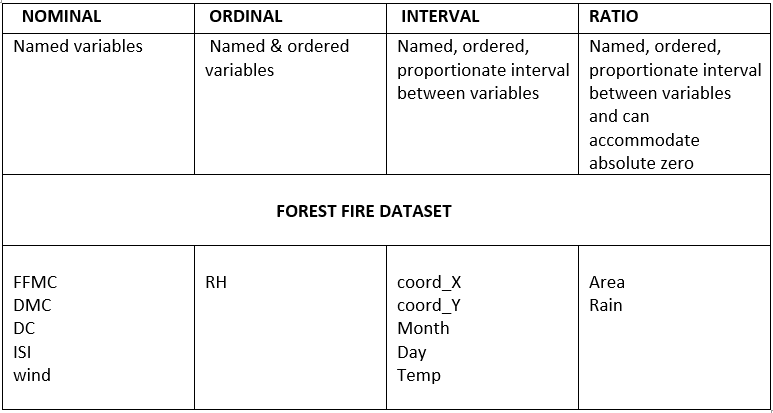

### 2. Visualize the  data for each attribute

<AxesSubplot:xlabel='coord_X'>

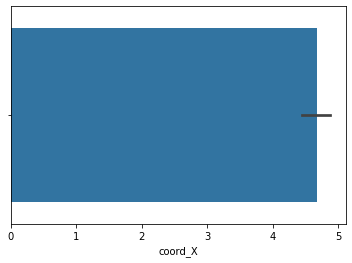

In [20]:
# Bargraph for single attribute can be visualized as follows
# Coord_X
sns.barplot(x='coord_X',data=df_forest)

<AxesSubplot:xlabel='coord_Y'>

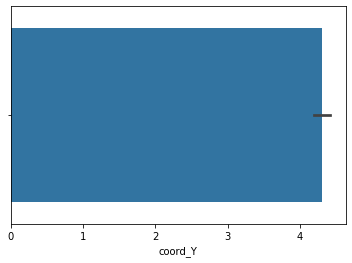

In [21]:
#coord_Y

sns.barplot(x='coord_Y',data=df_forest)

<AxesSubplot:xlabel='FFMC'>

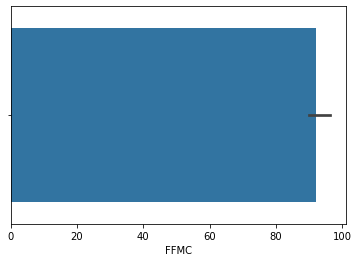

In [22]:
# FFMC

sns.barplot(x='FFMC',data=df_forest)

<AxesSubplot:xlabel='DMC'>

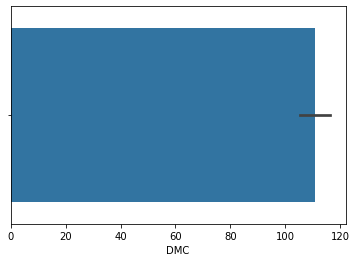

In [23]:
#DMC

sns.barplot(x='DMC',data=df_forest)

<AxesSubplot:xlabel='DC'>

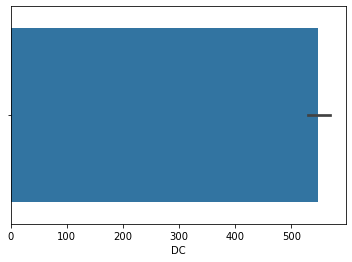

In [24]:
# DC

sns.barplot(x='DC',data=df_forest)

<AxesSubplot:xlabel='temp'>

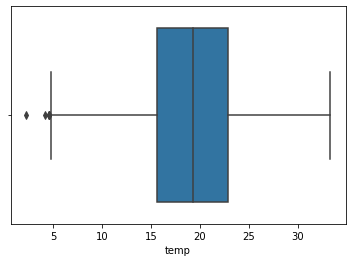

In [25]:
# Temperature

sns.boxplot(x=df_forest["temp"])

<AxesSubplot:xlabel='rain'>

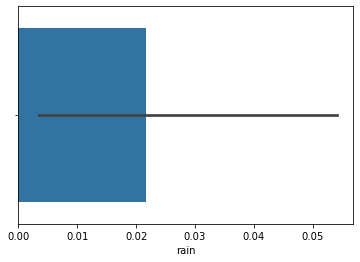

In [26]:
# Rain

sns.barplot(x=df_forest['rain'])

In [27]:
#sns.catplot(x="temp", y="area",hue="wind", col="temp",data=df_forest, kind="bar",height=4, aspect=.7);

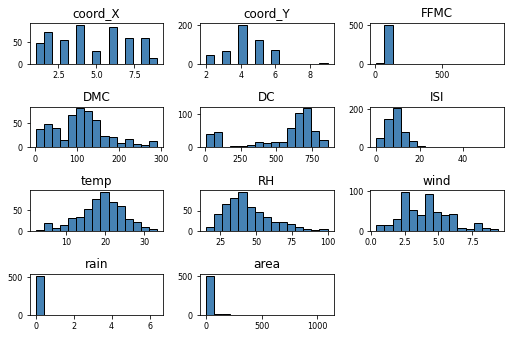

In [28]:
# Histogram plot for various attributes

df_forest.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

<AxesSubplot:>

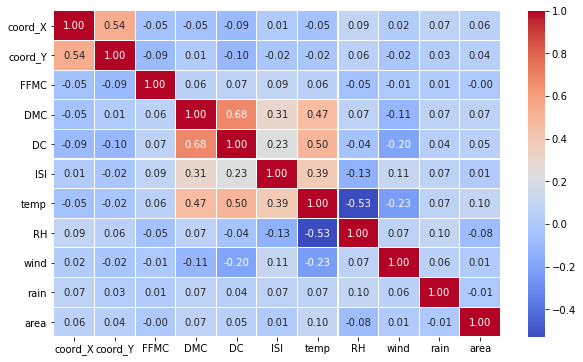

In [29]:
# Heatmap to find the relation between parameters

f, ax = plt.subplots(figsize=(10, 6))
corr = df_forest.corr()
sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)

### 3. Determine the possible values or "range of the values" for each attribute.

In [30]:
# To identify the range of values for each attribute

df_forest.coord_X.unique()

#df_forest.nunique()

array([7, 8, 6, 5, 4, 2, 9, 1, 3], dtype=int64)

In [31]:
# I have used lambda function to get the range of values for the attribute

print(df_forest.apply(lambda col: col.unique()))

coord_X                          [7, 8, 6, 5, 4, 2, 9, 1, 3]
coord_Y                                [5, 4, 6, 3, 2, 9, 8]
month      [mar, oct, aug, sep, apr, jun, jul, feb, jan, ...
day                      [fri, tue, sat, sun, mon, wed, thu]
FFMC       [86.2, 90.6, 91.7, 89.3, 92.3, 91.5, 91.0, 92....
DMC        [26.2, 35.4, 43.7, 33.3, 51.3, 85.3, 88.9, 145...
DC         [94.3, 669.1, 686.9, 77.5, 102.2, 488.0, 495.6...
ISI        [5.1, 6.7, 9.0, 9.6, 14.7, 8.5, 10.7, 7.0, 7.1...
temp       [8.2, 18.0, 14.6, 8.3, 11.4, 22.2, 24.1, 8.0, ...
RH         [51, 33, 97, 99, 29, 27, 86, 63, 40, 38, 72, 4...
wind       [6.7, 0.9, 1.3, 4.0, 1.8, 5.4, 3.1, 2.2, 7.2, ...
rain                     [0.0, 0.2, 1.0, 6.4, 0.8, 0.4, 1.4]
area       [0.0, 0.36, 0.43, 0.47, 0.55, 0.61, 0.71, 0.77...
dtype: object


### 4. Determine if there are any data values that we maybe concerned about and state whythey are of concern.  If/when concerns are discovered,suggest what can be done to address those concerns.

In [32]:
# To check if there are null values

df_forest.isna().any()

coord_X    False
coord_Y    False
month      False
day        False
FFMC       False
DMC        False
DC         False
ISI        False
temp        True
RH         False
wind       False
rain       False
area       False
dtype: bool

#### By using isna().any(), we can see that  "temp" returns boolean object as True. This denotes that the attribute "temp" has null values.

In [33]:
# Suggestion is to remove the "Nan" values present in temperature attribute

df_forest.dropna(inplace=True)

### Partition the data set into training data set and test data set. 

#### 80% train data and 20% test data

In [34]:
#  defines the values contained in the array correspond to the numeric parameters start, stop, and step.

X,y = np.arange(10).reshape((5, 2)), range(5)

In [35]:
X_train, X_test,y_train,y_test = train_test_split( X,y, train_size = 0.80, random_state=42)

In [36]:
X_train

array([[8, 9],
       [4, 5],
       [0, 1],
       [6, 7]])

In [37]:
X_test

array([[2, 3]])

#### 1. Here from the train and test data , I considered "temp", "area" attributes to plot the graph. As temp is an interval measurement and area is ratio measurement. 

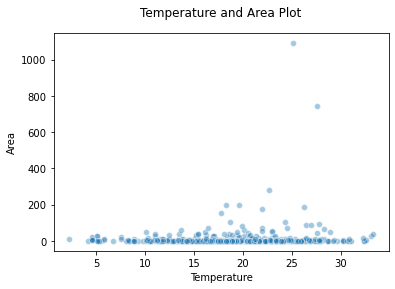

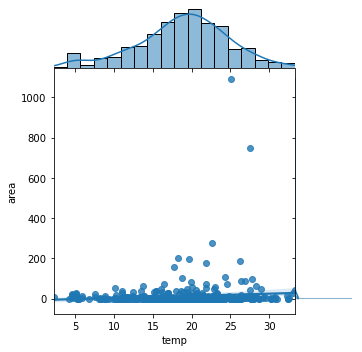

In [38]:
#Scatter plot for Two Attributes

#sns.barplot(x="temp", y="area", data=df_forest,color="blue", saturation=.5)

plt.scatter(df_forest['temp'], df_forest['area'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Temperature')
plt.ylabel('Area')
plt.title('Temperature and Area Plot',y=1.05)


# Joint Plot
jp = sns.jointplot(x='temp', y='area', data=df_forest,kind='reg', space=0, height=5, ratio=4)

#### 2. Visualizing for three attributes 

Text(0.5, 0, 'Wind speed in km/h')

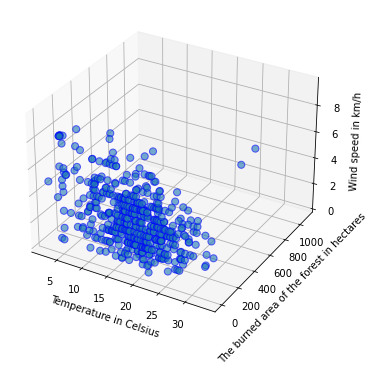

In [39]:
# Considering 3 attributes - Temp (data issue), Area(Ratio) and Wind (Nominal) data

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_forest['temp']
ys = df_forest['area']
zs = df_forest['wind']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='b')

ax.set_xlabel('Temperature in Celsius')
ax.set_ylabel('The burned area of the forest in hectares')
ax.set_zlabel('Wind speed in km/h')

## Exploratory Data Analysis:

In [40]:
# summarizing the data excluding the Nan values

df_forest.describe()

,coord_X,coord_Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,4.679612,4.302913,92.101165,111.001553,548.591845,9.035728,18.895922,44.330097,4.016699,0.021748,12.483825
std,2.311423,1.227716,37.182684,64.055503,247.560609,4.561636,5.815985,16.330242,1.790516,0.296531,63.162727
min,1.000000,2.000000,9.900000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,69.150000,439.300000,6.500000,15.550000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.900000,22.800000,53.000000,4.900000,0.000000,6.555000
max,9.000000,9.000000,921.000000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


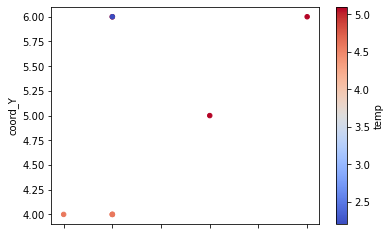

In [41]:
# scatter plot for single month

df_forest[df_forest.month=='dec'].plot(kind='scatter', x='coord_X', y='coord_Y', c='temp', cmap=plt.get_cmap('coolwarm'), colorbar=True)
plt.show()

In [42]:
# Correlation Matrix between attributes using Spearman Method

corr_matrix = df_forest.corr(method='spearman')
corr_matrix

,coord_X,coord_Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
coord_X,1.000000,0.491639,-0.064310,-0.080476,-0.073207,-0.014774,-0.052665,0.064074,0.025365,0.109331,0.065161
coord_Y,0.491639,1.000000,-0.016863,0.008177,-0.101999,-0.013351,-0.039904,0.052045,-0.014473,0.079154,0.053631
FFMC,-0.064310,-0.016863,1.000000,0.506550,0.257638,0.781080,0.591856,-0.323937,-0.032402,0.096754,0.027664
DMC,-0.080476,0.008177,0.506550,1.000000,0.556984,0.422985,0.501816,0.031465,-0.106328,0.120522,0.068030
DC,-0.073207,-0.101999,0.257638,0.556984,1.000000,0.100270,0.306887,0.022519,-0.202119,0.007885,0.057345
ISI,-0.014774,-0.013351,0.781080,0.422985,0.100270,1.000000,0.414878,-0.181799,0.138894,0.117297,0.012390
temp,-0.052665,-0.039904,0.591856,0.501816,0.306887,0.414878,1.000000,-0.521528,-0.178615,0.025753,0.077977
RH,0.064074,0.052045,-0.323937,0.031465,0.022519,-0.181799,-0.521528,1.000000,0.040853,0.181273,-0.026345
wind,0.025365,-0.014473,-0.032402,-0.106328,-0.202119,0.138894,-0.178615,0.040853,1.000000,0.120898,0.060195
rain,0.109331,0.079154,0.096754,0.120522,0.007885,0.117297,0.025753,0.181273,0.120898,1.000000,-0.064110


## Mining and Analytics:

### I tried using pairplot to visualize the parameters derived from Fire Weather Index (FWI) System. 

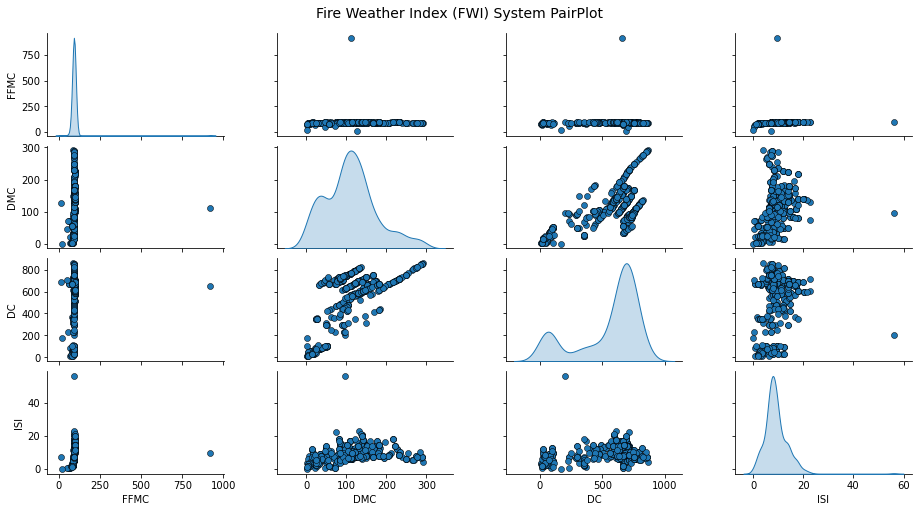

In [43]:
cols = ['FFMC', 'DMC', 'DC', 'ISI']
pp = sns.pairplot(df_forest[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Fire Weather Index (FWI) System PairPlot', fontsize=14)

## Evaluation:

Not applicable.

## Results:

#### An independent variable is the variable whose change does not affect any other variable in the experiment. However, dependent variable is what is being studied or measured in the experiment. Therefore, dependent variable depends on the independent variable.

#### In this dataset, the client might want to consider the following as predictor (independent) and predicted (dependent) variable

##### Predictor (independent variables) - coord_X, coord_Y, month, day , Temp, Area
##### Predicted (dependent variables are dependent on "Temp") -  FFMC, DMC, DC, ISI, RH, Wind, Rain

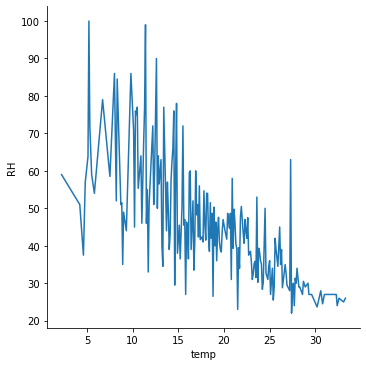

In [45]:
# Example of how Relative Humidity is increasing with Temperature

sns.relplot(x="temp", y="RH", ci=None, kind="line", data=df_forest);

## References:
    
https://datatofish.com/use-pandas-to-calculate-stats-from-an-imported-csv-file/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/

https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8

https://blog.prepscholar.com/independent-and-dependent-variables

CS5402 Lecture Notes - Having Enough Data.pptx